Epoch 1/12


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 - 11s - 26ms/step - accuracy: 0.9055 - loss: 0.3094 - val_accuracy: 0.9817 - val_loss: 0.0592
Epoch 2/12
422/422 - 11s - 26ms/step - accuracy: 0.9687 - loss: 0.1047 - val_accuracy: 0.9853 - val_loss: 0.0467
Epoch 3/12
422/422 - 11s - 26ms/step - accuracy: 0.9768 - loss: 0.0763 - val_accuracy: 0.9860 - val_loss: 0.0461
Epoch 4/12
422/422 - 11s - 26ms/step - accuracy: 0.9811 - loss: 0.0619 - val_accuracy: 0.9902 - val_loss: 0.0330
Epoch 5/12
422/422 - 11s - 26ms/step - accuracy: 0.9848 - loss: 0.0503 - val_accuracy: 0.9908 - val_loss: 0.0318
Epoch 6/12
422/422 - 12s - 29ms/step - accuracy: 0.9856 - loss: 0.0462 - val_accuracy: 0.9915 - val_loss: 0.0303
Epoch 7/12
422/422 - 14s - 33ms/step - accuracy: 0.9875 - loss: 0.0396 - val_accuracy: 0.9908 - val_loss: 0.0352
Epoch 8/12
422/422 - 12s - 29ms/step - accuracy: 0.9898 - loss: 0.0331 - val_accuracy: 0.9910 - val_loss: 0.0340
Epoch 9/12
422/422 - 12s - 29ms/step - accuracy: 0.9901 - loss: 0.0321 - val_accuracy: 0.9915 - val_loss: 0

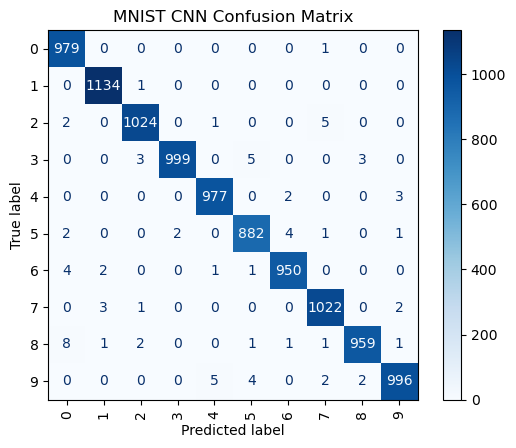

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 2. Pre-process the data
x_train = x_train.astype("float32") / 255  # Normalize pixel values to [0, 1]
x_test  = x_test.astype("float32") / 255   # Normalize pixel values to [0, 1]

# 3. Reshape data for CNN (add channel dimension)
x_train = np.expand_dims(x_train, -1)  # Shape becomes (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test, -1)   # Shape becomes (10000, 28, 28, 1)

# 4. One-hot encode labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test  = keras.utils.to_categorical(y_test, 10)

# 5. Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),                 # Dropout layer to reduce overfitting
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

# 6. Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# 7. Train the model
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=12,
    validation_split=0.1,
    verbose=2
)

# 8. Evaluate the model on the test data
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# 9. Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 10. Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("MNIST CNN Confusion Matrix")
plt.show()


Epoch 1/12


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 - 12s - 28ms/step - accuracy: 0.9022 - loss: 0.3224 - val_accuracy: 0.9832 - val_loss: 0.0599
Epoch 2/12
422/422 - 14s - 32ms/step - accuracy: 0.9681 - loss: 0.1063 - val_accuracy: 0.9850 - val_loss: 0.0487
Epoch 3/12
422/422 - 15s - 35ms/step - accuracy: 0.9779 - loss: 0.0767 - val_accuracy: 0.9877 - val_loss: 0.0450
Epoch 4/12
422/422 - 10s - 25ms/step - accuracy: 0.9813 - loss: 0.0615 - val_accuracy: 0.9895 - val_loss: 0.0374
Epoch 5/12
422/422 - 10s - 25ms/step - accuracy: 0.9840 - loss: 0.0524 - val_accuracy: 0.9908 - val_loss: 0.0336
Epoch 6/12
422/422 - 10s - 25ms/step - accuracy: 0.9860 - loss: 0.0458 - val_accuracy: 0.9905 - val_loss: 0.0315
Epoch 7/12
422/422 - 11s - 25ms/step - accuracy: 0.9870 - loss: 0.0423 - val_accuracy: 0.9922 - val_loss: 0.0324
Epoch 8/12
422/422 - 10s - 24ms/step - accuracy: 0.9892 - loss: 0.0361 - val_accuracy: 0.9908 - val_loss: 0.0306
Epoch 9/12
422/422 - 10s - 25ms/step - accuracy: 0.9897 - loss: 0.0321 - val_accuracy: 0.9913 - val_loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


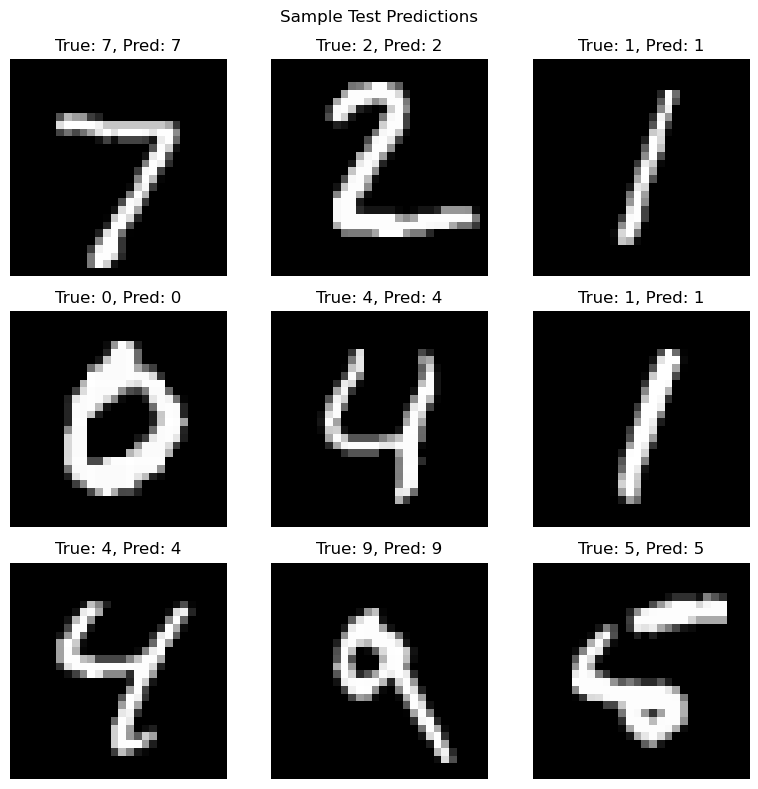

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Figure size 600x600 with 0 Axes>

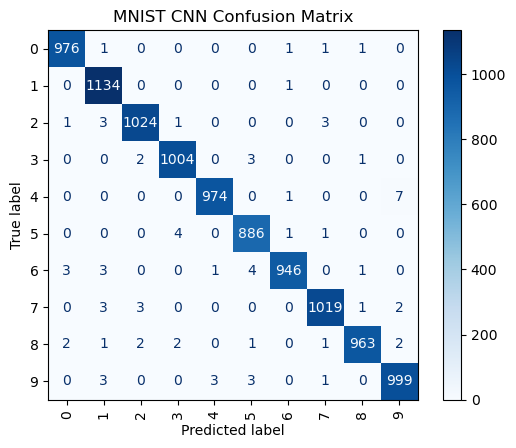

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 2. Pre-process the data
x_train = x_train.astype("float32") / 255   # Normalize to [0,1]
x_test  = x_test.astype("float32")  / 255

# 3. Reshape for CNN input
x_train = np.expand_dims(x_train, -1)       # (60000,28,28,1)
x_test  = np.expand_dims(x_test, -1)        # (10000,28,28,1)

# 4. One-hot encode labels
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat  = keras.utils.to_categorical(y_test,  10)

# 5. Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# 6. Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 7. Train
history = model.fit(
    x_train, y_train_cat,
    batch_size=128,
    epochs=12,
    validation_split=0.1,
    verbose=2
)

# --- New Visualizations ---

# 8. Plot training & validation accuracy and loss
hist_df = pd.DataFrame(history.history)           # convert to DataFrame :contentReference[oaicite:5]{index=5}
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist_df.index+1, hist_df['loss'], label='Train Loss')
plt.plot(hist_df.index+1, hist_df['val_loss'], label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Training & Validation Loss')
plt.legend(); plt.grid(True)

plt.subplot(1,2,2)
plt.plot(hist_df.index+1, hist_df['accuracy'], label='Train Acc')
plt.plot(hist_df.index+1, hist_df['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Training & Validation Accuracy')
plt.legend(); plt.grid(True)
plt.tight_layout()
plt.show()

# 9. Visualize sample predictions
n_samples = 9
plt.figure(figsize=(8,8))
for i in range(n_samples):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    pred_label = np.argmax(model.predict(x_test[i:i+1]), axis=1)[0]
    true_label = y_test[i]
    plt.title(f"True: {true_label}, Pred: {pred_label}")  # display labels :contentReference[oaicite:6]{index=6}
    plt.axis('off')
plt.suptitle('Sample Test Predictions')
plt.tight_layout()
plt.show()

# 10. Confusion Matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)              # compute confusion matrix :contentReference[oaicite:7]{index=7}

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
plt.figure(figsize=(6,6))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("MNIST CNN Confusion Matrix")
plt.show()
